In [1]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully unin

1.Data Preprocessing

1.1. Libraries

In [2]:
#Install the necessary libraries
import numpy as np 
import pandas as pd 
import os #Install the os library for file and directory operations

#Used to make Matplotlib outputs visible instantly
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns #Install the Seaborn library for data visualization

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from tqdm import tqdm
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.python.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings("ignore") #Use it to hide warnings

2024-10-21 16:50:02.268886: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-21 16:50:02.268953: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-21 16:50:02.271087: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


1.2. Define Dataset

In [3]:
#Directory containing image files
fish_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset' 

#The folders (fish classes) in this directory are being imported. Folders without '.' are classes.
classes = [i for i in os.listdir(fish_dir) if '.' not in i]                     
classes #Shows fish species

['Hourse Mackerel',
 'Black Sea Sprat',
 'Sea Bass',
 'Red Mullet',
 'Trout',
 'Striped Red Mullet',
 'Shrimp',
 'Gilt-Head Bream',
 'Red Sea Bream']

In [4]:
#Creating empty lists for image paths and tags
label = []
path = []
#Browsing the file directories
for dir_name, _,filenames in os.walk(fish_dir):                    
    for filename in filenames:      
       #Only process files with .png extension
        if os.path.splitext(filename)[-1]=='.png':  
             # Tag if not in 'GT' (ground truth) folder
            if dir_name.split()[-1]!='GT':                       
                label.append(os.path.split(dir_name)[-1]) #Returns folder name tag      
                path.append(os.path.join(dir_name,filename)) #Save file path    

data = pd.DataFrame(columns=['path','label'])
data['path']=path
data['label']=label

1.3. Display the first few rows, basic information and visualization

In [5]:
# Let's display the DataFrame
data


,path,label
0,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
1,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
2,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
3,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
4,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
...,...,...
8995,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8996,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8997,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8998,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream


In [6]:
# Display the first image path (at index 0)
data.path[0]

'/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00929.png'

In [7]:
# Let's examine the general information of the data set
# Let's find out how many rows are in the data set, what are the data types, and is there any missing data?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


In [8]:
# Let's see the last few lines
# Let's understand the data structure more clearly by showing the last 5 lines

data.tail()

,path,label
8995,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8996,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8997,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8998,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8999,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream


In [9]:
# Let's see the first few lines
# Let's understand the data structure more clearly by showing the first 5 lines

data.head()

,path,label
0,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
1,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
2,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
3,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
4,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel


In [10]:
# Let's check if there is any missing or incorrect data in the data set
# Let's look at the number of missing data

print(data.isnull().sum())  

path     0
label    0
dtype: int64


In [11]:
# Let's calculate the percentage of each class
class_percentage = data['label'].value_counts(normalize=True) * 100
print(class_percentage)

label
Hourse Mackerel       11.111111
Black Sea Sprat       11.111111
Sea Bass              11.111111
Red Mullet            11.111111
Trout                 11.111111
Striped Red Mullet    11.111111
Shrimp                11.111111
Gilt-Head Bream       11.111111
Red Sea Bream         11.111111
Name: proportion, dtype: float64


In [12]:
# Count the distribution of tags (shows how many of each class of fish there are)
data['label'].value_counts()

label
Hourse Mackerel       1000
Black Sea Sprat       1000
Sea Bass              1000
Red Mullet            1000
Trout                 1000
Striped Red Mullet    1000
Shrimp                1000
Gilt-Head Bream       1000
Red Sea Bream         1000
Name: count, dtype: int64

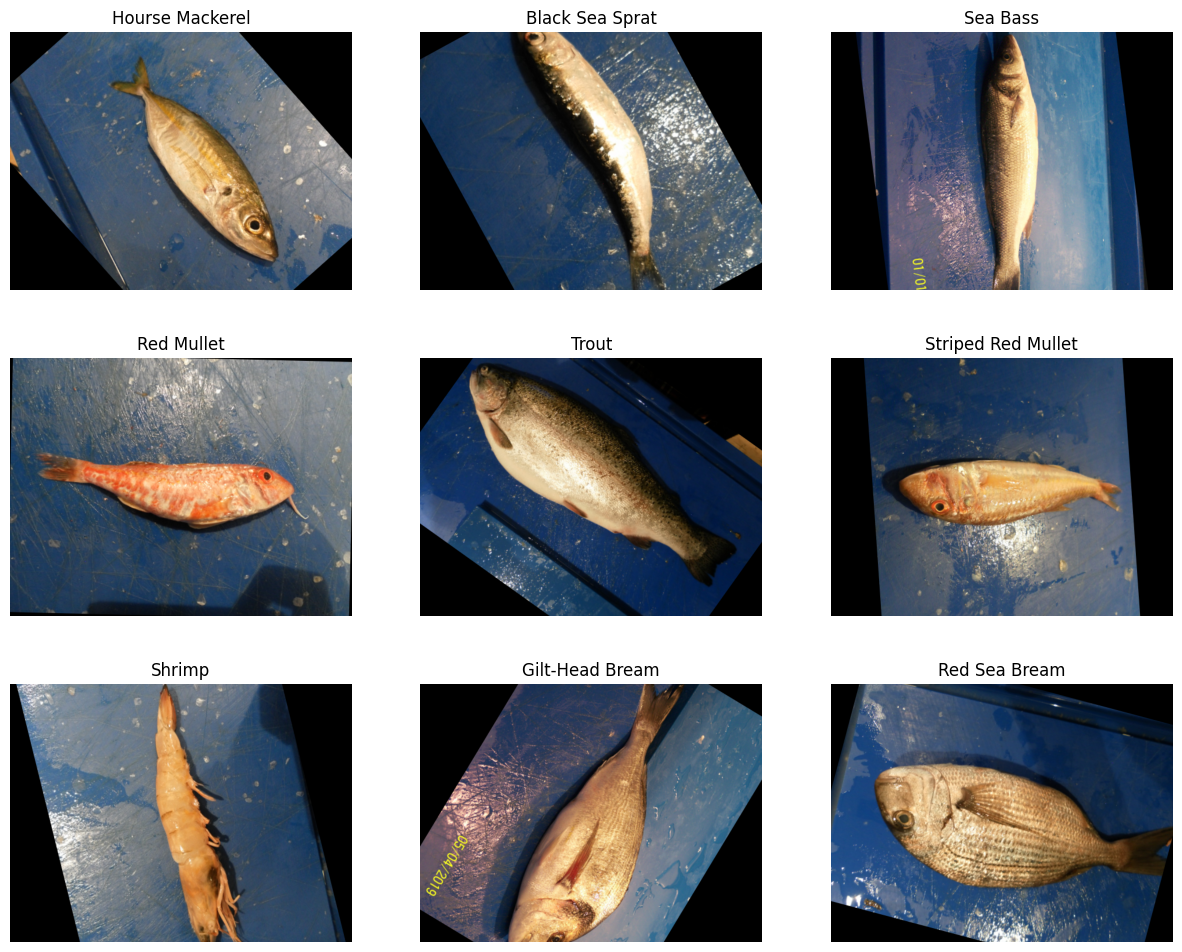

In [13]:
idx = 0
plt.figure(figsize=(15,12))
for unique_label in data['label'].unique():
    plt.subplot(3, 3, idx+1)
    plt.imshow(plt.imread(data[data['label']==unique_label].iloc[0,0]))
    plt.title(unique_label)
    plt.axis('off')
    idx+=1

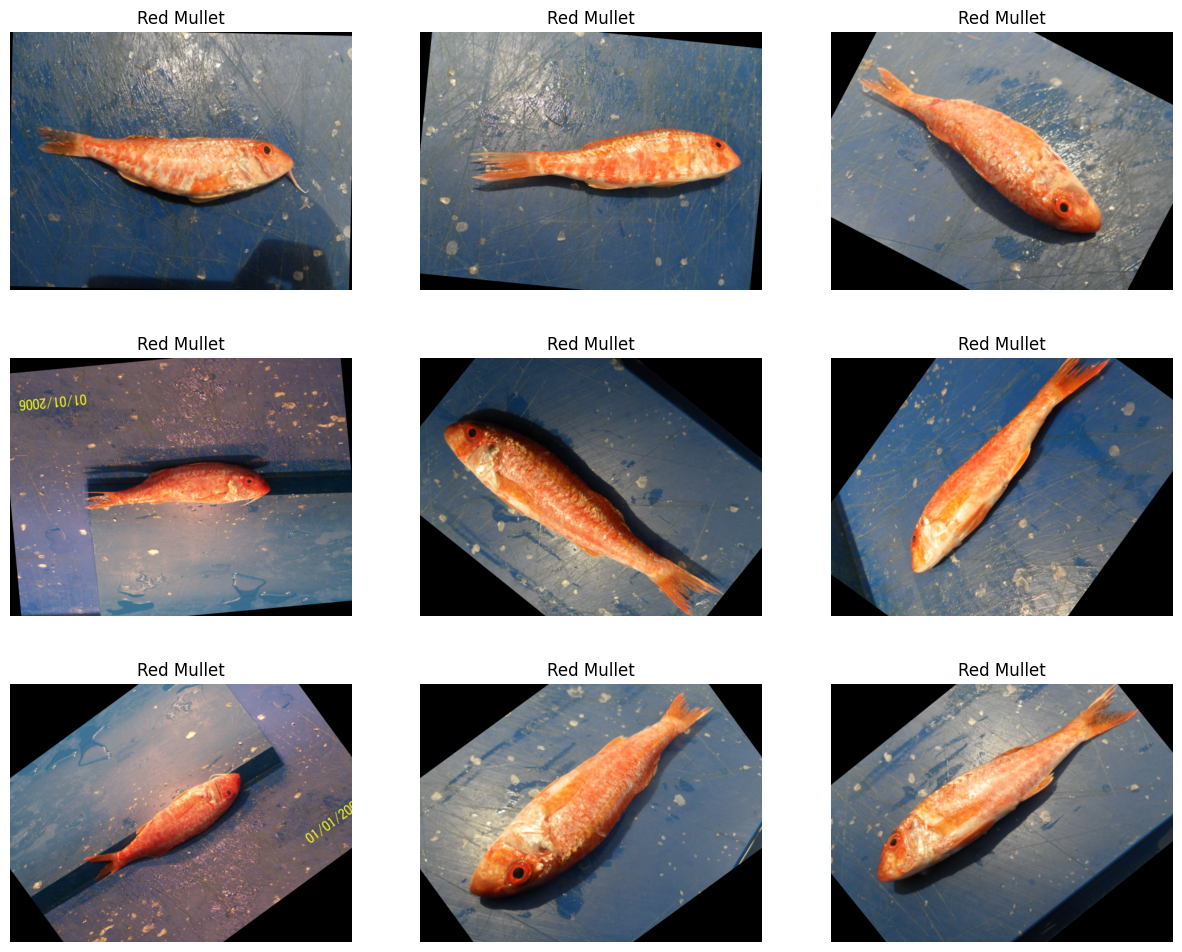

In [14]:
idx = 0
plt.figure(figsize=(15,12))
for unique_label in data['label'].unique():
    plt.subplot(3, 3, idx+1)
    plt.imshow(plt.imread(data[data['label']=="Red Mullet"].iloc[idx,0]))
    plt.title("Red Mullet")
    plt.axis('off')
    idx+=1

In [15]:
main_directory = "/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset"
images = []
labels = []
for directory in tqdm(os.listdir(main_directory)):
    next_directory = f"{main_directory}/{directory}"
    if directory in ["README.txt", "license.txt", "Segmentation_example_script.m"]:
        continue
    i = 0
    for images_directory in os.listdir(next_directory):
        if "GT" not in images_directory:
            final_directory = f"{next_directory}/{images_directory}"
            for image in os.listdir(final_directory):
                # images.append(keras.utils.img_to_array(keras.utils.load_img(f"{final_directory}/{image}")))
                # labels.append(images_directory)
                images.append(cv2.resize(cv2.imread(f"{final_directory}/{image}"),(224, 224)).astype('float32') / 255)
                labels.append(images_directory)
        i+=1

100%|██████████| 12/12 [02:32<00:00, 12.70s/it]


In [16]:
print(images[0]) #Prints the first element of the images list.

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [17]:
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, random_state=0, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, random_state=0, test_size = 0.5)

In [18]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)
datagen.fit(X_train)

In [19]:
print(type(X_train))
print(X_train[0].shape)
print(X_val[0].shape)
print(X_test[0].shape)
len(X_train)

<class 'list'>
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


7200

In [20]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [21]:
print(y_train)

['Shrimp' 'Sea Bass' 'Striped Red Mullet' ... 'Trout' 'Red Mullet'
 'Sea Bass']


In [22]:
encoder = OneHotEncoder(sparse=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_val = encoder.transform(y_val.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))

In [23]:
print(y_train)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [24]:
model = tf.keras.models.Sequential([
  # inputs 
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  # hiddens layers
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  # output layer
  tf.keras.layers.Dense(9,activation="softmax")
])

In [25]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
results = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=50,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss',
                            patience=3,
                            restore_best_weights=True
                        )
                    ],
                    validation_data=(X_val, y_val))

Epoch 1/50
57/57 [==============================] - 39s 591ms/step - loss: 2.5848 - accuracy: 0.2314 - val_loss: 1.7523 - val_accuracy: 0.4067
Epoch 2/50
57/57 [==============================] - 31s 537ms/step - loss: 1.7432 - accuracy: 0.3768 - val_loss: 1.4334 - val_accuracy: 0.5589
Epoch 3/50
57/57 [==============================] - 31s 539ms/step - loss: 1.5713 - accuracy: 0.4471 - val_loss: 1.2670 - val_accuracy: 0.6533
Epoch 4/50
57/57 [==============================] - 31s 538ms/step - loss: 1.4131 - accuracy: 0.5085 - val_loss: 1.1469 - val_accuracy: 0.6811
Epoch 5/50
57/57 [==============================] - 31s 540ms/step - loss: 1.2806 - accuracy: 0.5617 - val_loss: 1.0246 - val_accuracy: 0.7178
Epoch 6/50
57/57 [==============================] - 31s 541ms/step - loss: 1.2051 - accuracy: 0.5940 - val_loss: 0.9108 - val_accuracy: 0.7711
Epoch 7/50
57/57 [==============================] - 31s 541ms/step - loss: 1.0840 - accuracy: 0.6346 - val_loss: 0.8020 - val_accuracy: 0.7933

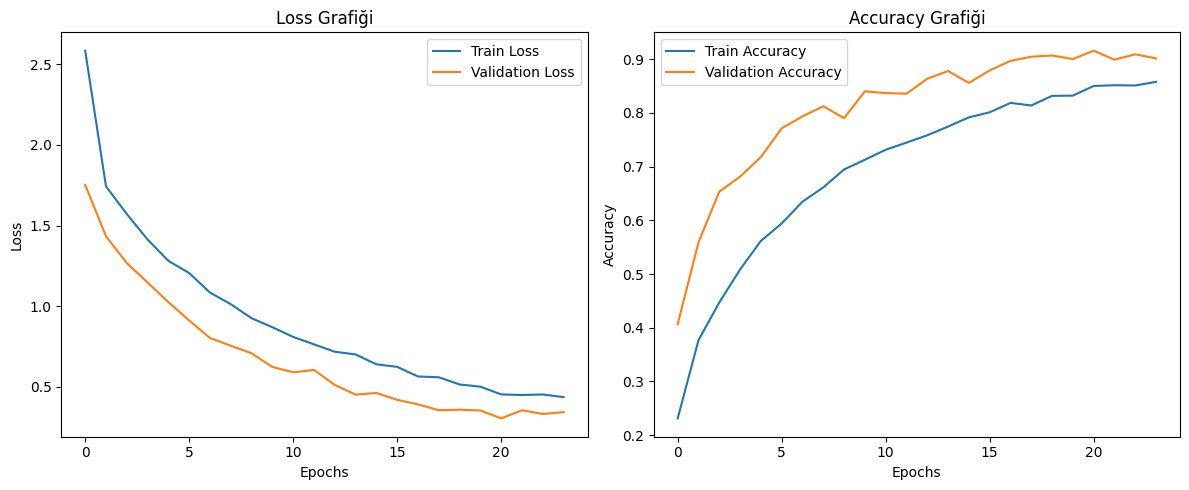

In [27]:
# Let's visualize the training results
plt.figure(figsize=(12, 5))

# Loss chart
plt.subplot(1, 2, 1)
plt.plot(results.history['loss'], label='Train Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title('Loss Grafiği')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy chart
plt.subplot(1, 2, 2)
plt.plot(results.history['accuracy'], label='Train Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Grafiği')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
# Let's make a prediction with the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

29/29 [==============================] - 1s 41ms/step


In [29]:
# Let's evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

Test loss: 0.3259062170982361
Test accuracy: 0.9077777862548828


In [30]:
test_labels = encoder.inverse_transform(y_test)
prediction_labels = encoder.inverse_transform(y_pred)
print(classification_report(test_labels, prediction_labels))

                    precision    recall  f1-score   support

   Black Sea Sprat       0.90      0.92      0.91       101
   Gilt-Head Bream       0.92      0.84      0.88        94
   Hourse Mackerel       0.95      0.86      0.90        98
        Red Mullet       0.90      1.00      0.95       101
     Red Sea Bream       0.95      0.95      0.95       104
          Sea Bass       0.84      0.91      0.87        89
            Shrimp       0.93      0.92      0.92       100
Striped Red Mullet       0.85      0.90      0.87       106
             Trout       0.94      0.87      0.90       107

          accuracy                           0.91       900
         macro avg       0.91      0.91      0.91       900
      weighted avg       0.91      0.91      0.91       900

